<a href="https://colab.research.google.com/github/CarolBw/CB-AI-English-teacher/blob/main/CB_AI_English_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto MVP CB-AI English teacher.
Trabalho de conclusão da Sprint Machine Learning & Analytics.
Pós graduação em Ciencia de Dados, PUC-RJ.



# Visão Geral

Este notebook contém o código para o desenvolvimento de um algoritmo professor de inglês utilizando técnicas de Processamento de Linguagem Natural (PNL) e Aprendizado de Máquina. O objetivo é criar um sistema capaz de entender consultas em inglês e fornecer respostas relevantes e informativas para auxiliar no aprendizado da língua inglesa.



# Preparação do Ambiente:





In [ ]:
# Instalando as bibliotecas

!pip install tensorflow transformers nltk pandas scikit-learn matplotlib seaborn


In [ ]:
# Importações para manipulação de dados e visualização
import numpy as np  # Biblioteca numérica para operações matemáticas eficientes
import pandas as pd  # Biblioteca para manipulação e análise de dados tabulares
import matplotlib.pyplot as plt  # Biblioteca para plotagem de gráficos
import seaborn as sns  # Biblioteca para plotagem de gráficos estatísticos

# Importações para comunicação com a web
import requests  # Biblioteca para fazer solicitações HTTP

# Importações para processamento de texto e análise de linguagem natural
import nltk  # Biblioteca para processamento de linguagem natural
from bs4 import BeautifulSoup  # Biblioteca para parsing de documentos HTML

# Importações para aprendizado de máquina e processamento de linguagem natural
import tensorflow as tf  # Biblioteca para aprendizado de máquina
from tensorflow import keras  # Biblioteca para construção e treinamento de modelos de aprendizado profundo
from transformers import BertTokenizer, TFBertForQuestionAnswering  # Biblioteca para modelos de linguagem baseados em BERT
from sklearn.model_selection import train_test_split  # Função para dividir dados em conjuntos de treinamento e teste
from google.colab import files  # Módulo para interação com arquivos no Google Colab
import sqlite3
from google.colab import drive
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from collections import Counter

# Coleta e carregamento dos dados

  O conjunto de dados consiste em conteúdo textual de Wikibooks em inglês e português, organizado em capítulos e disponibilizado em formato de texto simples e HTML. Recriei o Dataset selecionando apenas estas duas linguagens a partir do conjunto original que continha o conteúdo em diversas outras linguagens.
  
Conjunto original em:
https://www.kaggle.com/datasets/dhruvildave/wikibooks-dataset/data

In [ ]:
# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para o arquivo no Google Drive
caminho_arquivo = '/content/drive/MyDrive/Data-Science_Analytics/Projetos/CB-AI English Teacher/wikibooks_pt_en_version.sqlite'

# Conectar ao banco de dados
conexao = sqlite3.connect(caminho_arquivo)

# Cursor para executar comandos SQL
cursor = conexao.cursor()

# Consulta para listar todas as tabelas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tabelas = cursor.fetchall()

# Exibir o nome de todas as tabelas encontradas
print("Tabelas encontradas no banco de dados:")
for tabela in tabelas:
    print(tabela[0])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tabelas encontradas no banco de dados:
pt
en


# Análise exploratória de dados

In [ ]:
# Nossas tabelas relevantes
tabela_1= 'pt'
tabela_2= 'en'

# Carregar os dados em Dataframe para manipulaçao
query_1 = f"SELECT * FROM {tabela_1};"
df1 = pd.read_sql_query(query_1, conexao)

query_2 = f"SELECT * FROM {tabela_2};"
df2 = pd.read_sql_query(query_2, conexao)

# Fechar a conexão com o banco de dados original
conexao.close()

# Exibir as primeiras linhas para melhor compreesão do conteúdo
print("\nPrimeiras linhas do DataFrame 'pt':")
print(df1.head(10))
print("\nPrimeiras linhas do DataFrame 'en':")
print(df2.head(10))



Primeiras linhas do DataFrame 'pt':
                                               title  \
0   Wikilivros: Livro de receitas/Massa para empadas   
1           Wikilivros: Escotismo no Brasil/O que é?   
2              Wikilivros: Guia do Rugby/Leis/O Maul   
3  Wikilivros: Matemática elementar/Geometria pla...   
4            Wikilivros: Português para estrangeiros   
5              Wikilivros: Estruturas metálicas/Capa   
6  Wikilivros: Mecânica dos fluidos/Exercícios re...   
7  Wikilivros: WikiRPG/Lista de fobias e seu uso ...   
8  Wikilivros: ITIL V3/Estratégia de serviço/Conc...   
9                        Wikilivros: Pintura/Cultura   

                                                 url  \
0  https://pt.wikibooks.org/wiki/Livro_de_receita...   
1  https://pt.wikibooks.org/wiki/Escotismo_no_Bra...   
2  https://pt.wikibooks.org/wiki/Guia_do_Rugby/Le...   
3  https://pt.wikibooks.org/wiki/Matem%C3%A1tica_...   
4  https://pt.wikibooks.org/wiki/Portugu%C3%AAs_p...   
5  https:/

In [ ]:
# Verificando linhas e colunas para entender o tamanho do conjunto de dados
print("Linhas e colunas da tabela 'pt':", df1.shape)
print("Linhas e colunas da tabela 'en':", df2.shape)

# Verificando o comprimento médio dos textos para entender a complexidade
avg_len_pt = df1['body_text'].apply(len).mean()
avg_len_en = df2['body_text'].apply(len).mean()
print("Comprimento médio dos textos em português:", avg_len_pt)
print("Comprimento médio dos textos em inglês:", avg_len_en)

# Analisando a diversidade de temas através dos títulos únicos
unique_topics_pt = df1['title'].nunique()
unique_topics_en = df2['title'].nunique()
print("Número total de tópicos únicos em português:", unique_topics_pt)
print("Número total de tópicos únicos em inglês:", unique_topics_en)

# Verificando a presença de recursos educacionais específicos em inglês para contemplar o propósito do projeto
educational_resources_en = df2[df2['title'].str.contains('lesson', case=False)]
print("Número de recursos educacionais em inglês:", len(educational_resources_en))

# Verificando a diversidade e origem dos dados através da análise de URLs
unique_urls_pt = df1['url'].nunique()
unique_urls_en = df2['url'].nunique()
print("Número de fontes únicas em português:", unique_urls_pt)
print("Número de fontes únicas em inglês:", unique_urls_en)


Linhas e colunas da tabela 'pt': (13142, 5)
Linhas e colunas da tabela 'en': (86736, 5)
Comprimento médio dos textos em português: 5287.471693806117
Comprimento médio dos textos em inglês: 8415.921324478879
Número total de tópicos únicos em português: 13142
Número total de tópicos únicos em inglês: 86736
Número de recursos educacionais em inglês: 1266
Número de fontes únicas em português: 13142
Número de fontes únicas em inglês: 86736


Visualizando os dados:

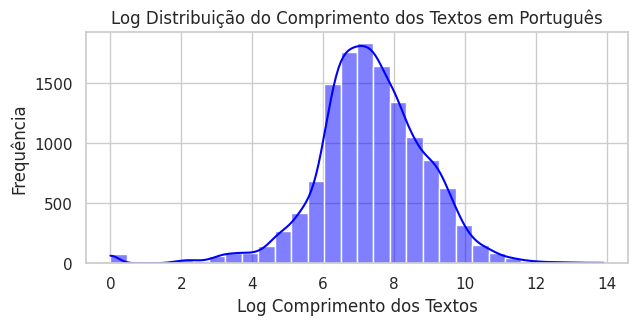

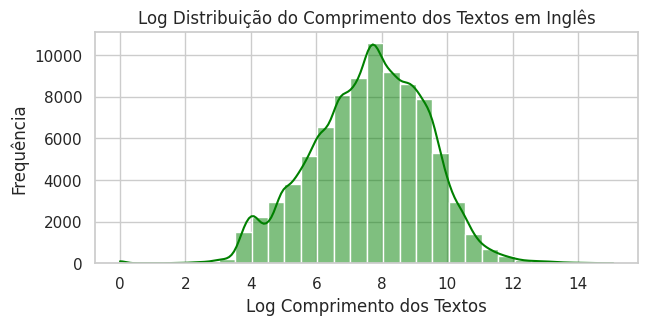

In [ ]:
# Aplicação da transformação logarítmica nos comprimentos dos textos para lidar melhor com a dispersao dos dados,
# visto que os textos possuem uma grande diversidade de tamanhos.
def log_transform(x):
    # Adiciona 1 antes de aplicar o log para evitar o logaritmo de zero.
    return np.log(x + 1)

# Aplica a transformação logarítmica nos comprimentos dos textos para os 2 Dataframes
log_lengths_pt = df1['body_text'].apply(len).apply(log_transform)
log_lengths_en = df2['body_text'].apply(len).apply(log_transform)

# Configura o estilo dos gráficos
sns.set(style="whitegrid")

# Histograma para a distribuição do comprimento dos textos em português.
plt.figure(figsize=(7, 3))
sns.histplot(log_lengths_pt, bins=30, color="blue", kde=True)
plt.title('Log Distribuição do Comprimento dos Textos em Português')
plt.xlabel('Log Comprimento dos Textos')
plt.ylabel('Frequência')
plt.show()

print()

# Histograma para a distribuição do comprimento dos textos em inglês.
plt.figure(figsize=(7, 3))
sns.histplot(log_lengths_en, bins=30, color="green", kde=True)
plt.title('Log Distribuição do Comprimento dos Textos em Inglês')
plt.xlabel('Log Comprimento dos Textos')
plt.ylabel('Frequência')
plt.show()

# Extrai a categoria principal de cada título, assumindo que a segunda parte da string
# (quando dividida por '/') representa a categoria do livro ou material.
def extract_category(title):
    parts = title.split('/')
    return parts[1] if len(parts) > 1 else 'Outros'

# Adiciona a coluna de categoria aos DataFrames para análise
df1['category'] = df1['title'].apply(extract_category)
df2['category'] = df2['title'].apply(extract_category)



Os histogramas de comprimento dos textos, após a transformação logarítmica, mostram que ambos os conjuntos de dados (português e inglês) seguem uma distribuição log-normal. A maioria dos textos tem comprimentos moderados, com uma cauda longa indicando a existência de textos significativamente mais longos. O pico da distribuição indica o comprimento mais frequente de texto, com o conjunto em inglês sugerindo textos ligeiramente mais longos em média do que o conjunto em português.

<ipython-input-8-b0183956c63b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df1, order=df1['category'].value_counts().index[:10], palette='viridis')


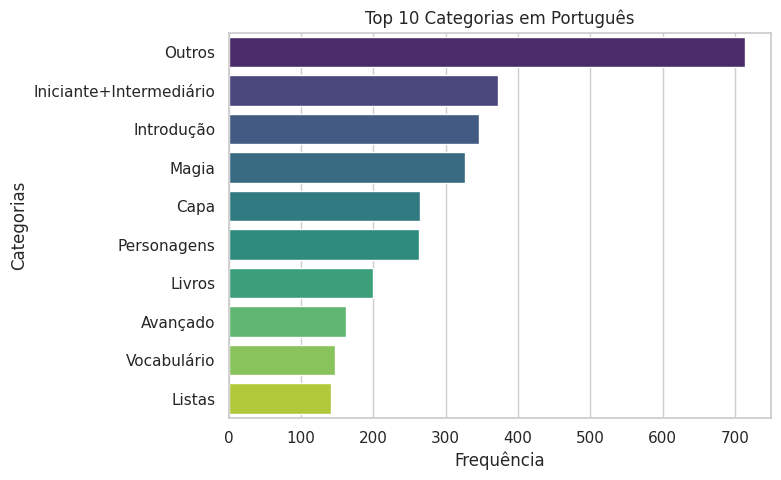

<ipython-input-8-b0183956c63b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df2, order=df2['category'].value_counts().index[:10], palette='viridis')


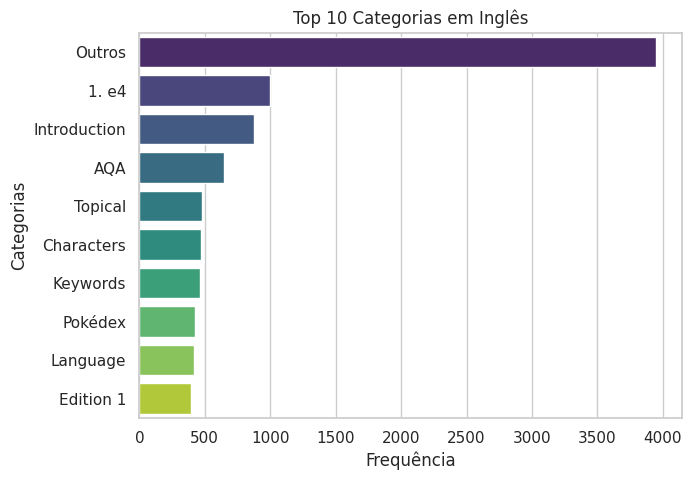

In [ ]:
# Visualizando a distribuição das categorias

# Cria um gráfico de barras para as categorias em português.
# A visualização de barras para comparar a frequência de diferentes temas.
plt.figure(figsize=(7, 5))
sns.countplot(y='category', data=df1, order=df1['category'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Categorias em Português')
plt.xlabel('Frequência')
plt.ylabel('Categorias')
plt.show()

# Cria um gráfico de barras para as categorias em inglês.
plt.figure(figsize=(7, 5))
sns.countplot(y='category', data=df2, order=df2['category'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Categorias em Inglês')
plt.xlabel('Frequência')
plt.ylabel('Categorias')
plt.show()

Os gráficos de distribuição de categorias mostram que ambos os conjuntos de dados, em português e inglês, têm uma grande variedade de tópicos, muitos deles agrupados na categoria "Outros". Os dois conjuntos apresentam categorias educacionais e introdutórias, indicando uma ênfase no material de ensino. Cada conjunto de dados contém também tópicos individuais que podem refletir sua cultura e particularidades.

In [ ]:
# Explorando as subcategorias dentro de "outros"



# Pré-processamento dos Dados:





# Definição e Treinamento do Modelo:




Escolha da arquitetura do modelo (GPT).



Definição e compilação do modelo de PNL.



Treinamento do modelo utilizando os dados preparados.


# Avaliação e ajuste do Modelo:




Usando métricas para avaliação do desempenho do modelo



Análise dos resultados

# Geração de respostas em linguagem natural


# Interação com o Usuário:





Implementação de uma interface de usuário para interação com o algoritmo professor de inglês.



Processamento de consultas do usuário e geração de respostas.

# Testes e Validação:



Testes do sistema em diferentes cenários e condições.



Validação da eficácia e precisão das respostas geradas.

# Integração e Implantação:



Integração do algoritmo professor de inglês em uma aplicação ou plataforma de ensino de inglês.



Implantação do sistema para uso em produção.